![](http://i67.tinypic.com/2jcbwcw.png)

# Project Ocean Trash

## Neural Network of Marine Debris data

**Author:** Jan Xu

**Date:** Dec 1 2018

### Import modules and visualization packages

In [33]:
# Suppress TensorFlow and Keras warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout

%matplotlib inline

In [15]:
dataclass = pd.read_csv("Datasets/dataclass.csv")
dataclass.head()

,Date,X,Y,Debris
0,07/07/2012,-124.566667,48.383333,0
1,07/07/2012,-124.016667,48.283333,0
2,07/07/2012,-124.033333,48.316667,0
3,07/07/2012,-124.350000,48.300000,1
4,07/07/2012,-126.183333,44.900000,1


In [16]:
x = dataclass[['X', 'Y']].values
y = dataclass['Debris'].values
print(x.shape)
print(y.shape)

(962, 2)
(962,)


In [17]:
y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.1,
                                                    random_state=1,
                                                    shuffle=True)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(865, 2)
(865, 2)
(97, 2)


In [20]:
baseline = len(dataclass[dataclass['Debris'] != 0]) / len(dataclass)
print('Baseline accuracy:', baseline*100, '%')

Baseline accuracy: 74.42827442827443 %


### Sequential model

In [38]:
# model initialization
model = Sequential() # instantiate empty Sequential model

# model contruction (architecture build computational graph)
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=25, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=2, activation='sigmoid'))

# model compilation
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [39]:
# Fit the model by iterating over the training data in batches

history = model.fit(X_train, y_train, epochs = 50, batch_size= 8)

Epoch 1/50
865/865 [==============================] - 5s 5ms/step - loss: 0.7369 - acc: 0.5318
Epoch 2/50
865/865 [==============================] - 1s 744us/step - loss: 0.6715 - acc: 0.5965
Epoch 3/50
865/865 [==============================] - 1s 715us/step - loss: 0.6135 - acc: 0.6578
Epoch 4/50
865/865 [==============================] - 1s 760us/step - loss: 0.6225 - acc: 0.6578
Epoch 5/50
865/865 [==============================] - 1s 760us/step - loss: 0.5877 - acc: 0.7249
Epoch 6/50
865/865 [==============================] - 1s 748us/step - loss: 0.5704 - acc: 0.7341
Epoch 7/50
865/865 [==============================] - 1s 783us/step - loss: 0.5731 - acc: 0.7387
Epoch 8/50
865/865 [==============================] - 1s 805us/step - loss: 0.5460 - acc: 0.7480
Epoch 9/50
865/865 [==============================] - 1s 792us/step - loss: 0.5753 - acc: 0.7445
Epoch 10/50
865/865 [==============================] - 1s 791us/step - loss: 0.5544 - acc: 0.7399
Epoch 11/50
865/865 [==========

In [40]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5028717020343494
Test accuracy: 0.784971098265896


In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5294505652693129
Test accuracy: 0.7731958762886598


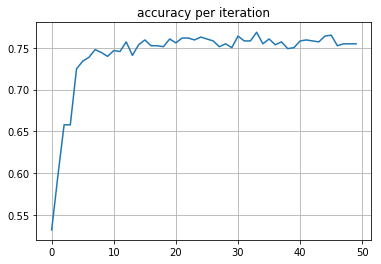

In [42]:
plt.plot(range(50), history.history['acc'])
plt.title('accuracy per iteration')
plt.grid();